In [4]:
from keras.datasets.mnist import load_data
#Mac to import ssl
#ssl._create_default_https_context = ssl._create_unverified_context
((x_train, y_train), (x_test, y_test)) = load_data()
#tuple允許把外面的括號拿掉                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [6]:
print("訓練資料維度", x_train.shape)
print("測試資料維度", x_test.shape)

訓練資料維度 (60000, 28, 28)
測試資料維度 (10000, 28, 28)


圖片號碼: 48163
ANS: 3


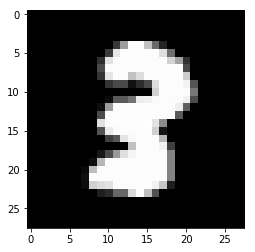

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import random

c = random.randint(0, 59999)
print("圖片號碼:", c)
print("ANS:", y_train[c])
plt.imshow(x_train[c], cmap="gray")

In [21]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,238,169,91,41,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,236,240,253,234,43,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,29,197,253,98,0,0,0,0,0


In [31]:
#整理一下
# x進去前一定要常態化(好配合keras一開始隨機的那組weights)
# 還要攤開(reshape)
# 除以255讓它標準化到 0 ~ 1 區間
x_train_shape = x_train.reshape(60000, 784) / 255
x_test_shape = x_test.reshape(10000, 784) / 255
# y進去的時候要one-hot enconding 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
#show
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [32]:
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
# 第一個中間層, 一定要告訴多少個輸入(input_dim)
mlp.add(Dense(128, input_dim=784, activation="relu")) # 128 + 784*128 = 100480
mlp.add(Dense(10, activation="softmax")) # 10 + 128*10 = 1290
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [33]:
# 訓練前: 確定模型訓練方式
# 回歸:mse, 二元分類(output:1):binary_crossentropy, 多元分類(output > 1):categorical_crossentropy
mlp.compile(optimizer="adam", 
            loss="categorical_crossentropy",
            metrics=["accuracy"])

In [34]:
# batch:看幾張圖做一次梯度下降
# epochs: 整個資料集看幾次
# epoch = 10, batch=200, 60000 * 10 / 200 = 3000梯度下降
mlp.fit(x_train_shape, 
        y_train_cat, 
        batch_size=200, 
        epochs=15,
        validation_split=0.1,
        verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
 - 2s - loss: 0.4399 - acc: 0.8795 - val_loss: 0.1866 - val_acc: 0.9507
Epoch 2/15
 - 1s - loss: 0.1977 - acc: 0.9435 - val_loss: 0.1422 - val_acc: 0.9615
Epoch 3/15
 - 1s - loss: 0.1470 - acc: 0.9581 - val_loss: 0.1143 - val_acc: 0.9670
Epoch 4/15
 - 1s - loss: 0.1169 - acc: 0.9664 - val_loss: 0.0990 - val_acc: 0.9717
Epoch 5/15
 - 1s - loss: 0.0964 - acc: 0.9725 - val_loss: 0.0924 - val_acc: 0.9740
Epoch 6/15
 - 1s - loss: 0.0803 - acc: 0.9779 - val_loss: 0.0891 - val_acc: 0.9750
Epoch 7/15
 - 1s - loss: 0.0691 - acc: 0.9803 - val_loss: 0.0800 - val_acc: 0.9772
Epoch 8/15
 - 1s - loss: 0.0587 - acc: 0.9838 - val_loss: 0.0778 - val_acc: 0.9768
Epoch 9/15
 - 1s - loss: 0.0515 - acc: 0.9859 - val_loss: 0.0773 - val_acc: 0.9787
Epoch 10/15
 - 1s - loss: 0.0454 - acc: 0.9874 - val_loss: 0.0762 - val_acc: 0.9763
Epoch 11/15
 - 1s - loss: 0.0388 - acc: 0.9899 - val_loss: 0.0741 - val_acc: 0.9782
Epoch 12/15
 - 1s - loss: 0.0337 - a

In [35]:
mlp.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 0s 19us/step


[0.08521752680586651, 0.9757]

In [37]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pd.DataFrame(confusion_matrix(y_test, mlp.predict_classes(x_test_shape)))

,0,1,2,3,4,5,6,7,8,9
0,972,0,2,0,2,0,0,2,2,0
1,0,1124,4,1,0,1,2,0,3,0
2,5,2,1007,6,2,0,1,4,5,0
3,0,0,1,994,0,3,0,5,1,6
4,2,0,2,0,962,0,5,2,0,9
5,4,0,0,13,2,860,5,3,2,3
6,7,2,1,1,4,1,941,0,1,0
7,0,7,7,8,1,0,0,1000,0,5
8,8,0,3,20,9,3,2,8,919,2
9,4,4,1,8,8,2,0,4,0,978


哪張圖?test.png
預測結果: [3]


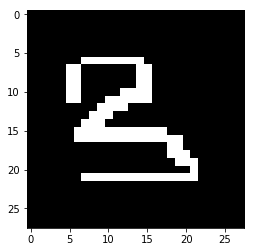

In [48]:
# Pillow
from PIL import Image
import numpy as np
fn = input("哪張圖?")
img1 = np.array(Image.open(fn).resize((28, 28)).convert("L"))
x_pre = np.array([img1]).reshape(1, 784) / 255
print("預測結果:", mlp.predict_classes(x_pre))
plt.imshow(img1, cmap="gray")